In [113]:
import dkist
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.nddata import CCDData
from astropy.visualization import ImageNormalize, SqrtStretch, LogStretch, ZScaleInterval
from astropy.coordinates import SkyCoord, SpectralCoord
import astropy.units as u
from sunpy.coordinates.frames import Helioprojective
from glob import glob
import os
import cmcrameri.cm as cmcm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import AutoLocator, AutoMinorLocator, FixedLocator, FixedFormatter, LogLocator, StrMethodFormatter
plt.style.use("science")


In [3]:
asdf_file = "../src/DKIST/pid_1_118/ARRGA/VISP_L1_20220602T172159_ARRGA.asdf"


In [4]:
ds = dkist.Dataset.from_asdf(asdf_file)

In [5]:
ds

This Dataset has 4 pixel and 5 world dimensions

dask.array<reshape, shape=(4, 490, 999, 2539), dtype=float64, chunksize=(1, 1, 999, 2539), chunktype=numpy.ndarray>

Pixel Dim  Axis Name                Data size  Bounds
        0  polarization state               4  None
        1  raster scan step number        490  None
        2  spatial along slit             999  None
        3  dispersion axis               2539  None

World Dim  Axis Name                  Physical Type                   Units
        0  stokes                     phys.polarization.stokes        unknown
        1  time                       time                            s
        2  helioprojective longitude  custom:pos.helioprojective.lon  arcsec
        3  helioprojective latitude   custom:pos.helioprojective.lat  arcsec
        4  wavelength                 em.wl                           nm

Correlation between pixel and world axes:

               Pixel Dim
World Dim    0    1    2    3
        0  yes   no

In [79]:
ds.wcs

<WCS(output_frame=CompositeFrame, input_frame=pixel, forward_transform=Model: CompoundModel
Inputs: ('x', 'slity', 'raster', 'x1')
Outputs: ('y', 'lon', 'lat', 'y0', 'y1')
Model set size: 1
Expression: [0] & [1] & [2] & [3]
Components: 
    [0]: <Linear1D(slope=0.00099981 nm / pix, intercept=854.231 nm)>

    [1]: <VaryingCelestialTransformSlit(crpix=[ 26.9124846, 499.       ] pix, cdelt=[0.21345685, 0.21345685] arcsec / pix, lon_pole=180.)>

    [2]: <Tabular1D(points=(<Quantity [  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,
                10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,
                20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,
                30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,
                40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,
                50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
                60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,
    

In [6]:
ds.data

dask.array<reshape, shape=(4, 490, 999, 2539), dtype=float64, chunksize=(1, 1, 999, 2539), chunktype=numpy.ndarray>

<WCSAxesSubplot:ylabel='Data'>

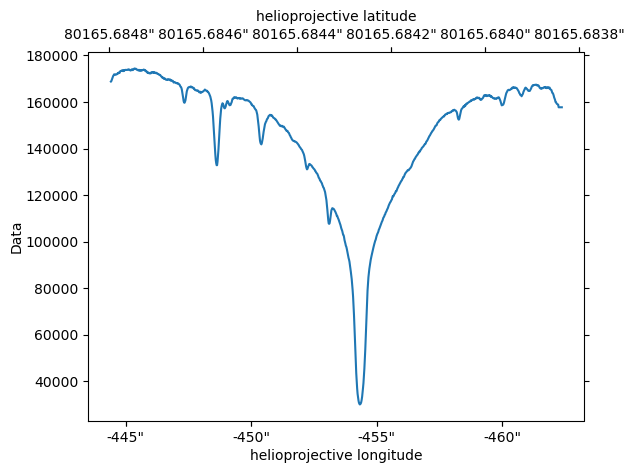

In [7]:
ds[0,100,:,0].plot()

<WCSAxesSubplot:ylabel='Data'>

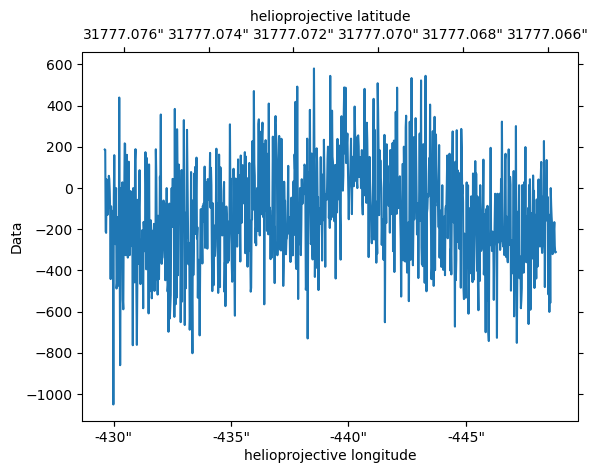

In [90]:
ds[3,100+123*2,:,500].plot()

In [8]:
CaII_sample_data = ds[0,100,:,0].data.compute()

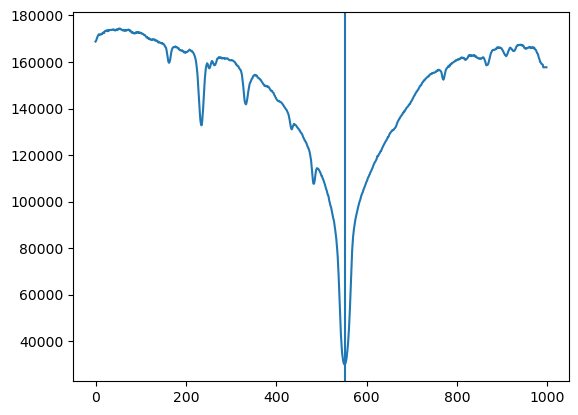

In [12]:
fig, ax = plt.subplots()
ax.plot(CaII_sample_data)
ax.axvline(552)

In [102]:
CaII_sample_data_2 = ds[3,120+123*3,:,600].data.compute()

(300.0, 800.0)

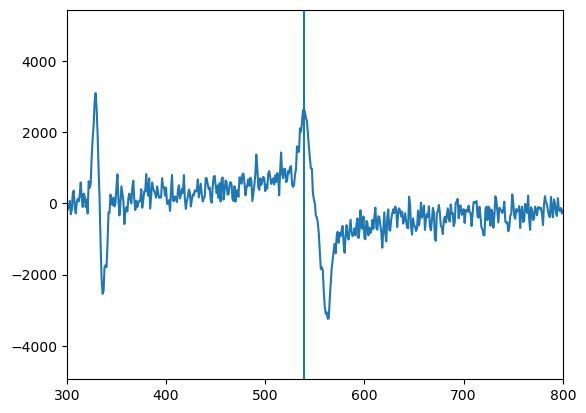

In [105]:
fig, ax = plt.subplots()
ax.plot(CaII_sample_data_2)
ax.axvline(539)
ax.set_xlim(300,800)

<WCSAxesSubplot:ylabel='Data'>

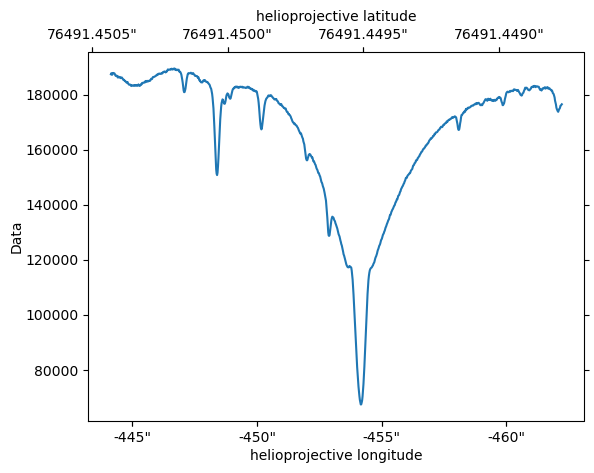

In [101]:
ds[0,120,:,600].plot()

In [13]:
CaII8542_line_core_data = ds[0,:,552,:].data.compute()

In [106]:
CaII8542_line_offcore_data = ds[3,:,539,:].data.compute()

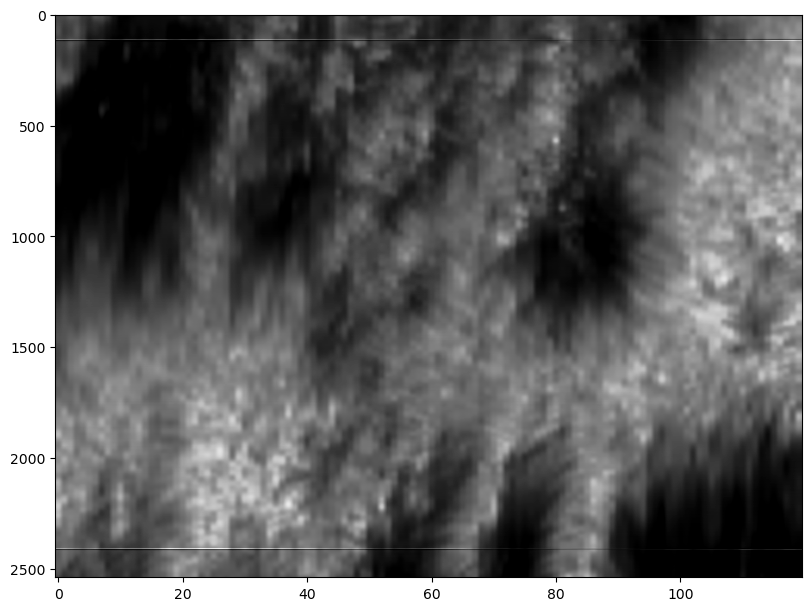

In [43]:
norm = ImageNormalize(CaII8542_line_core_data[:123,:].T,vmin=3e4,vmax=1e5)
fig, ax = plt.subplots(figsize=(8,6),constrained_layout=True)
ax.imshow(CaII8542_line_core_data[:120,:].T,aspect="auto",norm=norm,cmap="Greys_r")

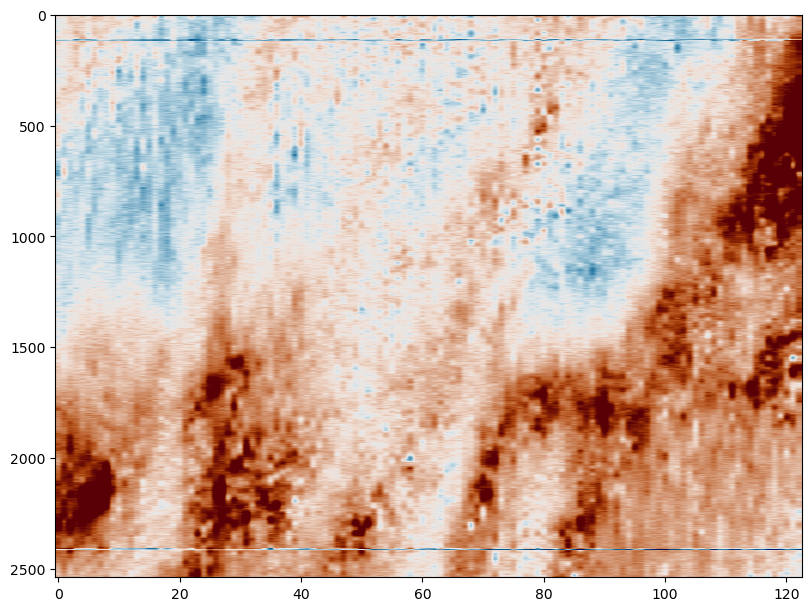

In [111]:
norm = ImageNormalize(CaII8542_line_offcore_data[123:245,:].T,vmin=-2e3,vmax=2e3)
fig, ax = plt.subplots(figsize=(8,6),constrained_layout=True)
ax.imshow(CaII8542_line_offcore_data[367:,:].T,aspect="auto",cmap=cmcm.vik,norm=norm)

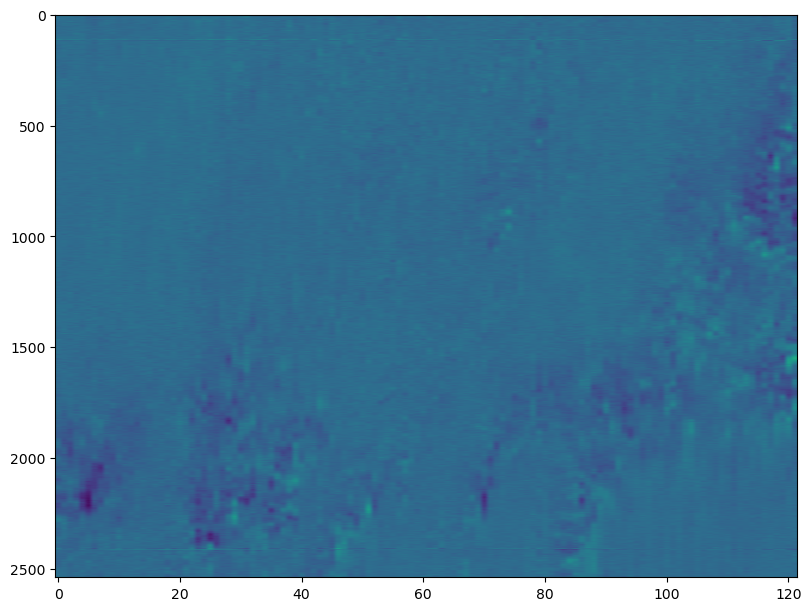

In [57]:
norm = ImageNormalize(CaII8542_line_core_data[123:245,:].T,vmin=-1e3,vmax=1e3)
fig, ax = plt.subplots(figsize=(8,6),constrained_layout=True)
ax.imshow(CaII8542_line_core_data[368:,:].T,aspect="auto")

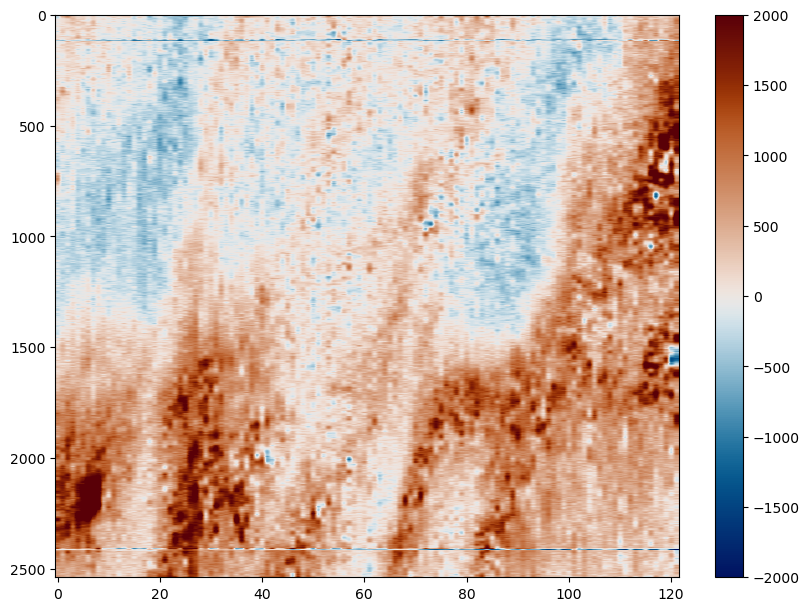

In [85]:
fig, ax = plt.subplots(figsize=(8,6),constrained_layout=True)
im = ax.imshow(CaII8542_line_offcore_data[368:,:].T,aspect="auto",vmax=2e3,vmin=-2e3,cmap=cmcm.vik)
plt.colorbar(im)

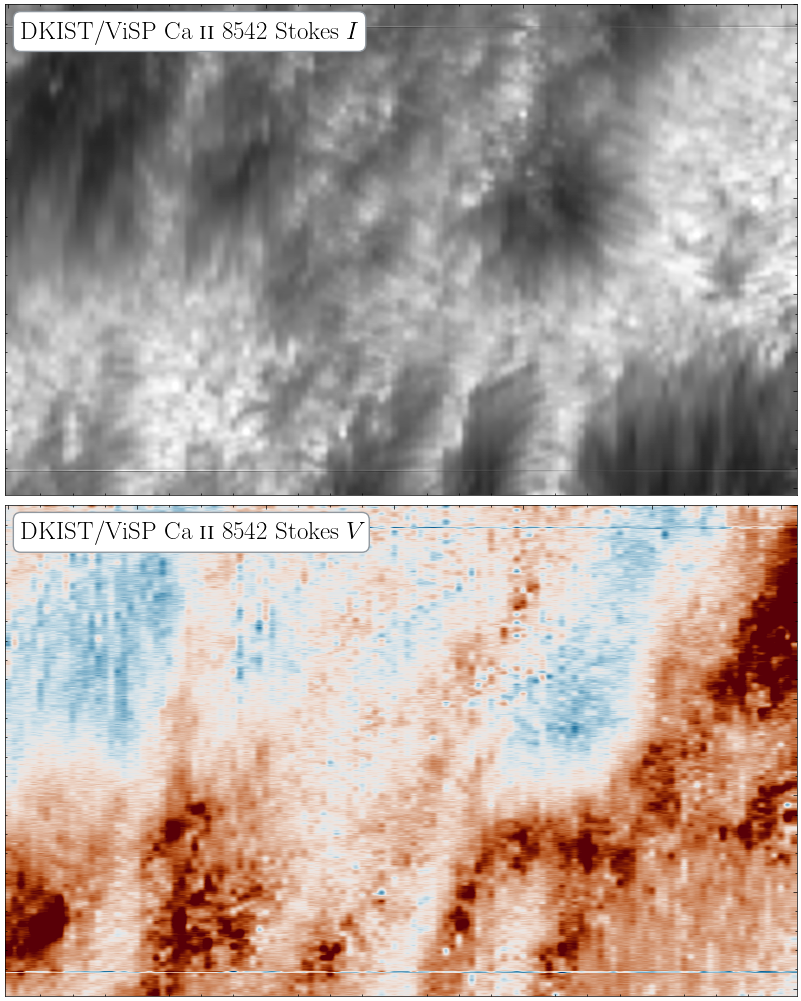

In [116]:
normI = ImageNormalize(CaII8542_line_core_data[:123,:].T,interval=ZScaleInterval())
normV = ImageNormalize(CaII8542_line_offcore_data[367:,:].T,vmin=-2e3,vmax=2e3)
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,10),constrained_layout=True)
ax1.imshow(CaII8542_line_core_data[:123,:].T,aspect="auto",norm=normI,cmap="Greys_r")

ax2.imshow(CaII8542_line_offcore_data[367:,:].T,aspect="auto",norm=normV,cmap=cmcm.vik)

ax1.text(0.02,0.97,r"DKIST/ViSP Ca \textsc{ii} 8542 Stokes $I$",va="top",ha="left",fontsize=18,transform=ax1.transAxes,
         bbox=dict(boxstyle="round",fc="w",ec="#91989F"))

ax2.text(0.02,0.97,r"DKIST/ViSP Ca \textsc{ii} 8542 Stokes $V$",va="top",ha="left",fontsize=18,transform=ax2.transAxes,
         bbox=dict(boxstyle="round",fc="w",ec="#91989F"))


for ax_ in (ax1,ax2):
    ax_.tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)

plt.savefig(fname="../img/DKIST/visp/CaII8542.pdf",format="pdf",bbox_inches="tight")
